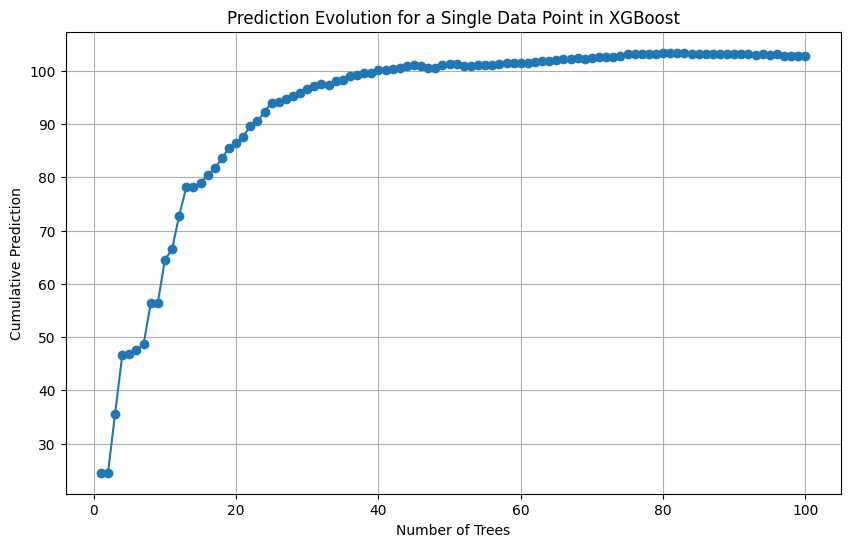

In [1]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=4, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 3,
    'seed': 42
}

num_boost_round = 100
model = xgb.train(params, dtrain, num_boost_round=num_boost_round)

data_point = X_test[2].reshape(1, -1)
ddata_point = xgb.DMatrix(data_point)

tree_contributions = []
for i in range(num_boost_round):
    pred = model.predict(ddata_point, output_margin=True, iteration_range=(0, i + 1))
    tree_contributions.append(pred[0])

cumulative_prediction = np.array(tree_contributions)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_prediction) + 1), cumulative_prediction, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Cumulative Prediction')
plt.title('Prediction Evolution for a Single Data Point in XGBoost')
plt.grid(True)
plt.show()

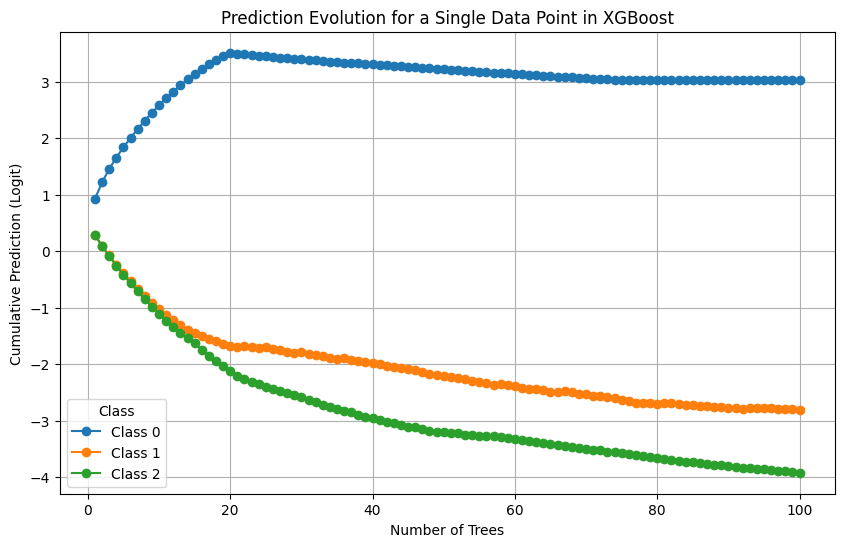

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = pd.DataFrame(load_iris().data), np.ravel(load_iris().target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = xgb.XGBClassifier()
gb_model.fit(X_train, y_train)

data_point = X_test.values[13].reshape(1, 4)

num_boost_round = 100
class_contributions = {0: [], 1: [], 2: []}

for i in range(num_boost_round):
    pred = gb_model.predict(data_point, output_margin=True, iteration_range=(0, i + 1))

    class_contributions[0].append(pred[0][0])
    class_contributions[1].append(pred[0][1])
    class_contributions[2].append(pred[0][2])

plt.figure(figsize=(10, 6))
for class_label, contributions in class_contributions.items():
    plt.plot(np.arange(1, len(contributions) + 1), contributions, marker='o', label=f'Class {class_label}')

plt.xlabel('Number of Trees')
plt.ylabel('Cumulative Prediction (Logit)')
plt.title('Prediction Evolution for a Single Data Point in XGBoost')
plt.legend(title='Class')
plt.grid(True)
plt.show()